In [1]:
import os
import pandas as pd
import numpy as np

In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
columns = ['img_path','label_diag']
labels_aptos = 'C:/Users/smirn/Desktop/RetinaDataset/APTOS_train_Labels.csv'
labels_kaggle = 'C:/Users/smirn/Desktop/RetinaDataset/Kaggle_train_Labels.csv'

In [5]:
ds1 =  pd.read_csv(labels_aptos,names = columns, sep = ',')
ds2 =  pd.read_csv(labels_kaggle,names = columns, sep = ',')

In [6]:
ds1

,img_path,label_diag
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [7]:
ds2

,img_path,label_diag
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [8]:
ds1_stat = ds1['label_diag'].value_counts(sort=False)
ds2_stat = ds2['label_diag'].value_counts(sort=False)

In [9]:
ds1_stat

label_diag
2     999
4     295
1     370
0    1805
3     193
Name: count, dtype: int64

In [10]:
ds2_stat

label_diag
0    25810
1     2443
2     5292
4      708
3      873
Name: count, dtype: int64

In [11]:
labels_num = [i for i in range(5)]

In [12]:
labels_num

[0, 1, 2, 3, 4]

In [13]:
def count_labels(ds1_st,ds2_st):
    stat_count=[]
    #global label_num11
    for i in labels_num:
        count = ds1_st[i]+ds2_st[i]
        stat_count.append(count)
    return stat_count

In [14]:
stat_count=count_labels(ds1_stat,ds2_stat)

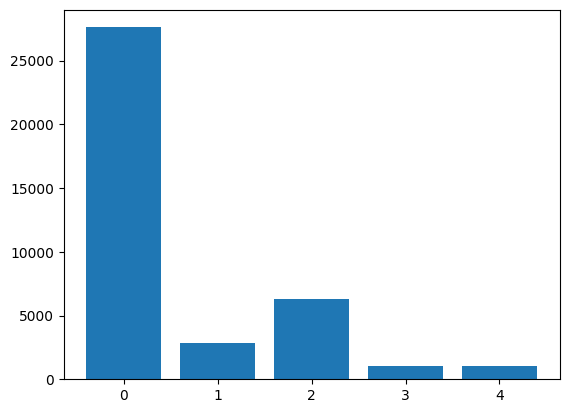

In [15]:
import matplotlib.pyplot as plt

plt.bar(labels_num,stat_count)
plt.show()

In [16]:
for i in range(5):
    print(f'Количество картинок с меткой {i}: {stat_count[i]}')

Количество картинок с меткой 0: 27615
Количество картинок с меткой 1: 2813
Количество картинок с меткой 2: 6291
Количество картинок с меткой 3: 1066
Количество картинок с меткой 4: 1003


In [17]:
label_0 = ds1.loc[ds1['label_diag']==0]['img_path'].to_numpy()
label_1= ds1.loc[ds1['label_diag']==1]['img_path'].to_numpy()
label_2= ds1.loc[ds1['label_diag']==2]['img_path'].to_numpy()
label_3= ds1.loc[ds1['label_diag']==3]['img_path'].to_numpy()
label_4= ds1.loc[ds1['label_diag']==4]['img_path'].to_numpy()
labels=(label_0,label_1,label_2,label_3,label_4)

In [18]:
Old_Folder = os.path.join('Desktop','RetinaDataset','APTOS_train_images')
New_Folder = os.path.join('Desktop','RetinaDataset','Train')

In [164]:
import shutil
count = 0
for i in range(5):
    if count >= 5000: continue 
    for j in labels[i]:
        j = j+'.png'
        path = os.path.join(Old_Folder,j)
        path_new = os.path.join(New_Folder,str(i),j)
        shutil.copyfile(path,path_new)
        count += 1
        #print(path)
        #print(path_new)
    
        



In [182]:
kagl_label_0 = ds2.loc[ds2['label_diag']==0]['img_path'].to_numpy()
kagl_label_1= ds2.loc[ds2['label_diag']==1]['img_path'].to_numpy()
kagl_label_2= ds2.loc[ds2['label_diag']==2]['img_path'].to_numpy()
kagl_label_3= ds2.loc[ds2['label_diag']==3]['img_path'].to_numpy()
kagl_label_4= ds2.loc[ds2['label_diag']==4]['img_path'].to_numpy()
kagl_labels=(kagl_label_0,kagl_label_1,kagl_label_2,kagl_label_3,kagl_label_4)

In [183]:
Old_Folder_kagl = os.path.join('Desktop','RetinaDataset','Kaggle_train')

In [194]:
import shutil
for i in range(5):
    for j in kagl_labels[i]:
        j = j+'.jpeg'
        path = os.path.join(Old_Folder_kagl,j)
        path_new = os.path.join(New_Folder,str(i),j)
        shutil.copyfile(path,path_new)
    
    

In [ ]:
#Дальше примерно уравновесим количество картинок между классами. Там где их мало, будем добавлять аугментацией, а в 0 папке удалим 20000 случайных фото.
#Получиться ~7к в 0 папке и по 3 к в остальных

In [19]:
import random

In [20]:
o_label_delete = os.listdir(os.path.join(New_Folder,str(0)))
files_remove = random.sample(o_label_delete,20000)

ValueError: Sample larger than population or is negative

In [ ]:
for i in files_remove:
    path_rm = os.path.join(New_Folder,str(0),i)
    os.remove(path_rm)

In [ ]:
two_label_delete = os.listdir(os.path.join(New_Folder,str(2)))
files_two_remove = random.sample(two_label_delete,2400)

In [225]:
for i in files_two_remove:
    path_rm = os.path.join(New_Folder,str(2),i)
    os.remove(path_rm)

In [30]:
from PIL import Image
from PIL import ImageEnhance

In [27]:
!pip install imgaug 

  Obtaining dependency information for imgaug from https://files.pythonhosted.org/packages/66/b1/af3142c4a85cba6da9f4ebb5ff4e21e2616309552caca5e8acefe9840622/imgaug-0.4.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/c5/97/0894cf6226508f9c8300447641f8f63d04d90617e27f0e6253d1ea299196/scipy-1.13.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for scikit-image>=0.14.2 from https://files.pythonhosted.org/packages/86/f0/18895318109f9b508f2310f136922e455a453550826a8240b412063c2528/scikit_image-0.22.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.met


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import imgaug as ia
import imgaug.augmenters as iaa

In [75]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.05)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.2))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.85, 1.15)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.9, 1.1), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.10, 0.10), "y": (-0.10, 0.10)},
        rotate=(-15, 15)        
    )
], random_order=True)

In [76]:
path = os.path.join(New_Folder,str(3),three_label_augment[0])

In [111]:
def augment_image(path):
    img = Image.open(path)
    im = np.array(img)
    im = np.expand_dims(im, 0)
    #print(im.shape)
    image_aug = seq(images=im)
    image_aug = np.squeeze(image_aug, axis=0)
    image_np = Image.fromarray(image_aug)
    return image_np

In [112]:
three_label_augment = os.listdir(os.path.join(New_Folder,str(3)))
four_label_augment = os.listdir(os.path.join(New_Folder,str(4)))
three_dir = os.path.join(New_Folder,str(3))
four_dir = os.path.join(New_Folder,str(4))

In [117]:
def augmentation(dir,list):
    for i in range(len(list)):
        name = list[i]
        name_no_ext = name.split('.')[0]
        ext = name.split('.')[1]
        path = os.path.join(dir,name)
        aug_image_one = augment_image(path)
        aug_image_two = augment_image(path)
        new_name_one = f'{name_no_ext}_1.{ext}'
        new_name_two = f'{name_no_ext}_2.{ext}'
        #print(new_name_one)
        #print(new_name_two)
        #print(aug_image_one)
        aug_image_one.save(os.path.join(dir,new_name_one))
        aug_image_two.save(os.path.join(dir,new_name_two))

In [118]:
augmentation(three_dir,three_label_augment)

In [119]:
augmentation(four_dir,four_label_augment)

In [139]:
newsize = (640, 640)
def resize_imgs(dir,list):
    for i in range(len(list)):
        name = list[i]
        path = os.path.join(dir,name)
        img = Image.open(path)
        img = img.resize(newsize)
        #print(img.size)
        #print(os.path.join(dir,name))
        img.save(os.path.join(dir,name))


In [136]:
zero_label_resize = os.listdir(os.path.join(New_Folder,str(0)))
one_label_resize = os.listdir(os.path.join(New_Folder,str(1)))
two_label_resize = os.listdir(os.path.join(New_Folder,str(2)))
three_label_resize = os.listdir(os.path.join(New_Folder,str(3)))
four_label_resize = os.listdir(os.path.join(New_Folder,str(4)))
zero_dir = os.path.join(New_Folder,str(0))
one_dir = os.path.join(New_Folder,str(1))
two_dir = os.path.join(New_Folder,str(2))
three_dir = os.path.join(New_Folder,str(3))
four_dir = os.path.join(New_Folder,str(4))

In [137]:
print(zero_dir)
print(len(zero_label_resize))
print(one_dir)
print(len(one_label_resize))
print(two_dir)
print(len(two_label_resize))
print(three_dir)
print(len(three_label_resize))
print(four_dir)
print(len(four_label_resize))

Desktop\RetinaDataset\Train\0
7120
Desktop\RetinaDataset\Train\1
2813
Desktop\RetinaDataset\Train\2
3891
Desktop\RetinaDataset\Train\3
3198
Desktop\RetinaDataset\Train\4
3009


In [140]:
resize_imgs(zero_dir,zero_label_resize)
print('Folder zero processed')
resize_imgs(one_dir,one_label_resize)
print('Folder one processed')
resize_imgs(two_dir,two_label_resize)
print('Folder two processed')
resize_imgs(three_dir,three_label_resize)
print('Folder three processed')
resize_imgs(four_dir,four_label_resize)
print('Done')

Folder zero processed
Folder one processed
Folder two processed
Folder three processed
Done


In [149]:
st0 =len(zero_label_resize)
st1 =len(one_label_resize)
st2 = len(two_label_resize)
st3 = len(three_label_resize)
st4 = len(four_label_resize)
labels_num = [i for i in range(5)]
stat_count = (st0,st1,st2,st3,st4)

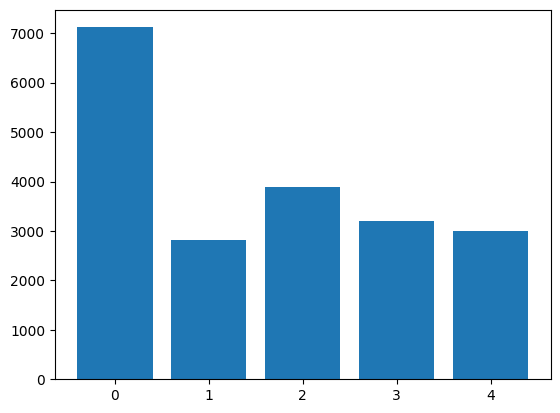

In [150]:
import matplotlib.pyplot as plt

plt.bar(labels_num,stat_count)
plt.show()

In [9]:
import shutil
import os
import random

In [7]:
data_dir = 'Desktop/RetinaDataset/Train/'

In [3]:
!mkdir "C:\Users\smirn\Desktop\RetinaDataset\Test"
!mkdir "C:\Users\smirn\Desktop\RetinaDataset\Test\0"
!mkdir "C:\Users\smirn\Desktop\RetinaDataset\Test\1"
!mkdir "C:\Users\smirn\Desktop\RetinaDataset\Test\2"
!mkdir "C:\Users\smirn\Desktop\RetinaDataset\Test\3"
!mkdir "C:\Users\smirn\Desktop\RetinaDataset\Test\4"

In [11]:
# Перекинем 10% картинок из train в test
path00 = os.listdir(data_dir + '/0')
path01 = os.listdir(data_dir + '/1')    
path02 = os.listdir(data_dir + '/2')    
path03 = os.listdir(data_dir + '/3')     
path04 = os.listdir(data_dir + '/4')

test_samle_size = int(len(path01)*0.1)

source= 'Desktop/RetinaDataset/Train/0'
destination='Desktop/RetinaDataset/Test/0'
for i in range(int(len(path00)*0.1)):
  sample = random.choice(os.listdir(source))
  src_path = os.path.join(source, sample)
  dst_path = os.path.join(destination, sample)
  os.rename(src_path, dst_path)

source= 'Desktop/RetinaDataset/Train/1'
destination='Desktop/RetinaDataset/Test/1'
for i in range(int(len(path01)*0.1)):
  sample = random.choice(os.listdir(source))
  src_path = os.path.join(source, sample)
  dst_path = os.path.join(destination, sample)
  os.rename(src_path, dst_path)

source= 'Desktop/RetinaDataset/Train/2'
destination='Desktop/RetinaDataset/Test/2'
for i in range(int(len(path02)*0.1)):
  sample = random.choice(os.listdir(source))
  src_path = os.path.join(source, sample)
  dst_path = os.path.join(destination, sample)
  os.rename(src_path, dst_path)

source= 'Desktop/RetinaDataset/Train/3'
destination='Desktop/RetinaDataset/Test/3'
for i in range(int(len(path03)*0.1)):
  sample = random.choice(os.listdir(source))
  src_path = os.path.join(source, sample)
  dst_path = os.path.join(destination, sample)
  os.rename(src_path, dst_path)

source= 'Desktop/RetinaDataset/Train/4'
destination='Desktop/RetinaDataset/Test/4'
for i in range(int(len(path04)*0.1)):
  sample = random.choice(os.listdir(source))
  src_path = os.path.join(source, sample)
  dst_path = os.path.join(destination, sample)
  os.rename(src_path, dst_path)

In [23]:
import os
from PIL import Image
import numpy as np

In [14]:
data_dir = 'Desktop/RetinaDataset/Test'

In [26]:
def load_img(path):
    img=Image.open(path)
    img = img.resize((224,224))
    img_np = np.array(img)
    return img_np

In [32]:
test_x=[]
test_y=[]
for i in os.listdir(data_dir):
    for j in os.listdir(os.path.join(data_dir,i)):
        path= os.path.join(data_dir,i,j)
        img = load_img(path)
        test_y.append(int(i))
        test_x.append(img)
        #print(path)

In [33]:
test_y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
